This notebook aims to go through a basic implementation of the gradient boosting algorithm with a Bayesian twist, using decision trees as our base estimator.  First we need to import 

In [1]:
from sklearn.utils import resample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle,resample
from scipy.stats import beta


![Oops Something is wrong](beta_approximation.png "Beta Approximation")

![Oops Something is wrong](comparison.png "Beta Approximation")

In [2]:
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * .9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
xi = X_train
yi = y_train

In [3]:
import beta_boosting as bb
rnd_reg = bb.GradientBoostingRegressor(max_depth=2,
                                    n_estimators=5000,
                                    subsample = .9,
                                    learning_rate=.01)
rnd_reg.fit(X_train,y_train)
predictions = rnd_reg.predict(X_test)
beta_test_score = np.zeros((5000,), dtype=np.float64)

for i, y_pred in enumerate(rnd_reg.staged_predict(X_test)):
    beta_test_score[i] = (np.mean((y_test - y_pred)**2))

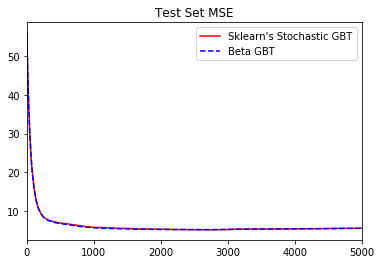

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
n_est = 5000
rnd_reg = GradientBoostingRegressor(max_depth=2,
                                    n_estimators=n_est,
                                    subsample = .9,
                                    learning_rate=.01)
rnd_reg.fit(X_train,y_train)
predictions = rnd_reg.predict(X_test)
test_score = np.zeros((n_est,), dtype=np.float64)

for i, y_pred in enumerate(rnd_reg.staged_predict(X_test)):
    test_score[i] = (np.mean((y_test - y_pred)**2))

    

plt.plot(test_score, label = "Sklearn's Stochastic GBT", color = 'red')
plt.plot(beta_test_score, label = 'Beta GBT',
         color = 'blue', linestyle = 'dashed')
plt.xlim(0,5000)
plt.legend()
plt.title('Test Set MSE')
plt.show()

In [5]:
def function(i):
    scalar = 2
    a = 26
    b = 1
    scale = 80
    loc = -68
    x = scalar*beta.pdf(i, a=a, b=b, scale=scale, loc=-68) + 0.01
    return x

bb.function = function
rnd_reg = bb.GradientBoostingRegressor(max_depth=2,
                                    n_estimators=5000,
                                    subsample = .9)
rnd_reg.fit(X_train,y_train)
predictions = rnd_reg.predict(X_test)
beta_test_score = np.zeros((n_est,), dtype=np.float64)

for i, y_pred in enumerate(rnd_reg.staged_predict(X_test)):
    beta_test_score[i] = (np.mean((y_test - y_pred)**2))

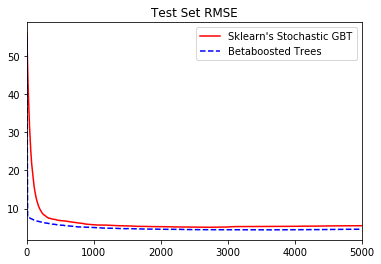

In [6]:
plt.plot(test_score, label = "Sklearn's Stochastic GBT", color = 'red')
plt.plot(beta_test_score, label = 'Betaboosted Trees',
         color = 'blue', linestyle = 'dashed')
plt.xlim(0,5000)
plt.legend()
plt.title('Test Set RMSE')
plt.show()